# Imputamos la columna urgencia mediante la función de python

In [1]:
import numpy as np
import pandas as pd
import urg_func
from datetime import date

In [2]:
df = pd.read_csv("ISSUES_Iteraciones.csv")
df2 = pd.read_csv("csv_prueba.csv")

In [3]:
df2

,Issue ID,Project ID,Classification,Screenshot,Urgency,Input Date,Deadline Theor,Deadline Real,Employee ID,Device,Browser,Page,Contact ID,Request,Iteraciones,Iteraciones 30 dias,Not addressing historico,Sentiment,Sentiment historico,Budget
0,IPC100101,PC1001,Design issues,0,NaN,2015-09-05,NaN,2015-09-06,E2,Mobile,Mozilla,True,COC1001,The spacing around section titles [645] should...,4.0,32,5,Neutral,1,6983.63
1,IPC1001010,PC1001,Copy issues,0,NaN,2015-02-06,NaN,2015-02-08,E1,Desktop,Safari,True,COC1001,Please rewrite for clarity the CTA button labe...,3.0,50,2,Neutral,7,6983.63
2,IPC10010100,PC1001,New item,0,NaN,2014-09-14,NaN,2014-09-16,E3,Desktop,Chrome,True,COC1001,"Please add a FAQs segmented by user type, to m...",12.0,15,0,Neutral,0,6983.63
3,IPC1001011,PC1001,New item,0,NaN,2015-06-14,NaN,2015-06-17,E3,Desktop,Chrome,True,COC1001,Please add a customizable data visualization b...,16.0,54,5,Positive,3,6983.63
4,IPC1001012,PC1001,Copy issues,1,NaN,2015-05-29,NaN,2015-06-01,E1,Desktop,Safari,True,COC1001,Please emphasize benefits over features the Ca...,3.0,48,3,Positive,1,6983.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,IPC909095,PC909,Bug fix,0,NaN,2014-01-05,NaN,2014-01-08,E3,Mobile,Safari,True,COC901,The search field behavior displays wrong font ...,9.0,30,2,Negative,4,8698.61
5696,IPC909096,PC909,Design issues,0,NaN,2014-01-01,NaN,2014-01-02,E2,Mobile,Chrome,True,COC901,The contrast levels in the hero section [344] ...,3.0,20,2,Negative,3,8698.61
5697,IPC909097,PC909,Copy issues,0,NaN,2013-04-22,NaN,2013-04-25,E1,Mobile,Safari,True,COC901,Please remove buzzwords from the ‘Contact Us’ ...,3.0,78,0,Neutral,6,8698.61
5698,IPC909098,PC909,Design issues,0,NaN,2013-04-15,NaN,2013-04-16,E2,Desktop,Chrome,True,COC901,The color palette [3] feels too heavy visually.,3.0,76,0,Negative,7,8698.61


In [4]:
df2["Budget"] = df2["Budget"].astype(float)
df2["Input Date"] = pd.to_datetime(df2["Input Date"])
df2["Deadline Real"] = pd.to_datetime(df2["Deadline Real"])

In [15]:
df2

,Issue ID,Project ID,Classification,Screenshot,Urgency,Input Date,Deadline Theor,Deadline Real,Employee ID,Device,Browser,Page,Contact ID,Request,Iteraciones,Iteraciones 30 dias,Not addressing historico,Sentiment,Sentiment historico,Budget
0,IPC100101,PC1001,Design issues,0,NaN,2015-09-05,NaN,2015-09-06,E2,Mobile,Mozilla,True,COC1001,The spacing around section titles [645] should...,4.0,32,5,Neutral,1,6983.63
1,IPC1001010,PC1001,Copy issues,0,NaN,2015-02-06,NaN,2015-02-08,E1,Desktop,Safari,True,COC1001,Please rewrite for clarity the CTA button labe...,3.0,50,2,Neutral,7,6983.63
2,IPC10010100,PC1001,New item,0,NaN,2014-09-14,NaN,2014-09-16,E3,Desktop,Chrome,True,COC1001,"Please add a FAQs segmented by user type, to m...",12.0,15,0,Neutral,0,6983.63
3,IPC1001011,PC1001,New item,0,NaN,2015-06-14,NaN,2015-06-17,E3,Desktop,Chrome,True,COC1001,Please add a customizable data visualization b...,16.0,54,5,Positive,3,6983.63
4,IPC1001012,PC1001,Copy issues,1,NaN,2015-05-29,NaN,2015-06-01,E1,Desktop,Safari,True,COC1001,Please emphasize benefits over features the Ca...,3.0,48,3,Positive,1,6983.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,IPC909095,PC909,Bug fix,0,NaN,2014-01-05,NaN,2014-01-08,E3,Mobile,Safari,True,COC901,The search field behavior displays wrong font ...,9.0,30,2,Negative,4,8698.61
5696,IPC909096,PC909,Design issues,0,NaN,2014-01-01,NaN,2014-01-02,E2,Mobile,Chrome,True,COC901,The contrast levels in the hero section [344] ...,3.0,20,2,Negative,3,8698.61
5697,IPC909097,PC909,Copy issues,0,NaN,2013-04-22,NaN,2013-04-25,E1,Mobile,Safari,True,COC901,Please remove buzzwords from the ‘Contact Us’ ...,3.0,78,0,Neutral,6,8698.61
5698,IPC909098,PC909,Design issues,0,NaN,2013-04-15,NaN,2013-04-16,E2,Desktop,Chrome,True,COC901,The color palette [3] feels too heavy visually.,3.0,76,0,Negative,7,8698.61


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Issue ID                  5700 non-null   object        
 1   Project ID                5700 non-null   object        
 2   Classification            5700 non-null   object        
 3   Screenshot                5700 non-null   int64         
 4   Urgency                   0 non-null      float64       
 5   Input Date                5700 non-null   datetime64[ns]
 6   Deadline Theor            0 non-null      float64       
 7   Deadline Real             5700 non-null   datetime64[ns]
 8   Employee ID               5700 non-null   object        
 9   Device                    5700 non-null   object        
 10  Browser                   5700 non-null   object        
 11  Page                      5700 non-null   bool          
 12  Contact ID          

In [6]:
# def dias(fecha, fin):
#     fecha = pd.to_datetime(fecha).values[0]
#     fin = fin.values[0]
#     if np.isnan(fin):
#         today = pd.Timestamp.today()
#         # print(today)
#         # print((today-fecha).days)
#         lapse = (today - fecha).days
#         # print(lapse)
#     else:
#         # print(fin-fecha)
#         lapse = (fin-fecha)/10**9/3600/24
#     if lapse >= 15:
#         return 5
#     if lapse >= 10:
#         return 3
#     if lapse >= 5:
#         return 2
#     return 1


In [7]:
# dias("2025-06-05","2025-06-08")

In [8]:
# date = df2[df2["Issue ID"] == "IPC100101"]["Input Date"]
# fin = df2[df2["Issue ID"] == "IPC100101"]["Deadline Real"]
# # print(date, fin)
# dias(date,fin)

In [9]:
urg = urg_func.urgencia(df2)

In [10]:
urg.value_counts()

Urgency
Medium      3687
Urgent      1494
Critical     299
Low          220
Name: count, dtype: int64

<Axes: >

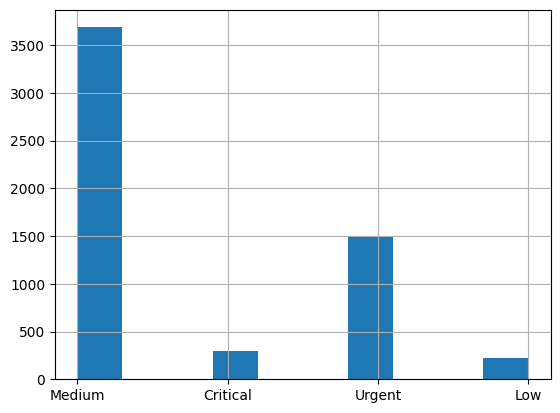

In [11]:
urg.hist()

In [12]:
df["Urgency"] = urg

In [35]:
def plazo(urgency,date):
    if urgency == "Critical":
        lapso = 1
    elif urgency == "Urgent":
        lapso = 2
    elif urgency == "Medium":
        lapso = 3
    else:
        lapso = 5
    return(pd.to_datetime(date) + pd.DateOffset(days=lapso))

In [36]:
teoria = []
for i in df["Issue ID"]:
    date = df[df["Issue ID"] == "IPC100101"]["Input Date"].values[0]
    urgency = df[df["Issue ID"] == "IPC100101"]["Urgency"].values[0]
    #print(urgency)
    teoria.append(plazo(urgency,date))
teoria    

[Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-08 00:00:00'),
 Timestamp('2015-09-

In [37]:
df["Deadline Theor"] = teoria

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Issue ID                  5700 non-null   object        
 1   Project ID                5700 non-null   object        
 2   Classification            5700 non-null   object        
 3   Screenshot                5700 non-null   int64         
 4   Urgency                   5700 non-null   object        
 5   Input Date                5700 non-null   object        
 6   Deadline Theor            5700 non-null   datetime64[ns]
 7   Deadline Real             5700 non-null   object        
 8   Employee ID               5700 non-null   object        
 9   Device                    5700 non-null   object        
 10  Browser                   5700 non-null   object        
 11  Page                      5700 non-null   bool          
 12  Contact ID          

In [39]:
df["Sentiment"] = df2["Sentiment"]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Issue ID                  5700 non-null   object        
 1   Project ID                5700 non-null   object        
 2   Classification            5700 non-null   object        
 3   Screenshot                5700 non-null   int64         
 4   Urgency                   5700 non-null   object        
 5   Input Date                5700 non-null   object        
 6   Deadline Theor            5700 non-null   datetime64[ns]
 7   Deadline Real             5700 non-null   object        
 8   Employee ID               5700 non-null   object        
 9   Device                    5700 non-null   object        
 10  Browser                   5700 non-null   object        
 11  Page                      5700 non-null   bool          
 12  Contact ID          

In [41]:
df.to_csv("Issues_def.csv")